Neural Networks and Universal Approximation Theorem

1.1 (a)

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def neuron(w, b, x):
    return w*x+b

def sigmoid(x):
    return 1/(1 + numpy.exp(-x))

b1 = -.4*1000
w1 = 1000
b2 = -.6*1000
w2 = 1000
w3 = 1
w4 = -1

In [212]:
X = np.arange(0, 1, 0.001)
Y = np.zeros(1000)
for i in range(1000):
    y = w3*sigmoid(neuron(w1, b1, X[i])) + w4*sigmoid(neuron(w2, b2, X[i]))
    Y[i] = y
    

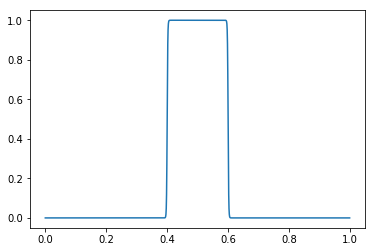

In [213]:
plt.plot(X, Y)
plt.show()

1.2 (a)

In [214]:
b1 = -.3 * 1000
w1 = 1000
b2 = -.7 * 1000
w2 = 1000
w3 = 1
w4 = -1

In [215]:
X1 = np.arange(0, 1, 0.001)
X2 = np.arange(0, 1, 0.001)
Y = np.zeros([1000, 1000])
X1, X2 = np.meshgrid(X1, X2)
for i in range(1000):
    for j in range(1000):
        y = w3*sigmoid(neuron(w1, b1, X1[i, j])) + w4*sigmoid(neuron(w2, b2, X1[i, j]))
        Y[i][j] = y
    

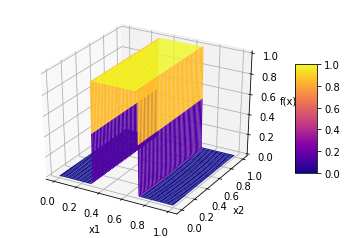

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, Y, cmap=cm.plasma)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
fig.colorbar(surface, shrink=.5, aspect=5)
plt.show()

(b)

In [217]:
b01 = -0.4 * 1000
w01 = 1000
b02 = -0.6 * 1000
w02 = 1000
b03 = -0.4 * 1000
w03 = 1000
b04 = -0.6 * 1000
w04 = 1000
b11 = -3000
w11 = 2000
w12 = -2000
w13 = 2000
w14 = -2000
w21 = 1

In [ ]:
X1 = np.arange(0, 1, 0.001)
X2 = np.arange(0, 1, 0.001)
X1, X2 = np.meshgrid(X1, X2)
Y = np.zeros([1000, 1000])
for i in range(1000):
    for j in range(1000):
        x = X1[i, j]
        y = X2[i, j]
        y1 = sigmoid(neuron(w01, b01, x))
        y2 = sigmoid(neuron(w02, b02, x))
        y3 = sigmoid(neuron(w03, b03, y))
        y4 = sigmoid(neuron(w04, b04, y))
        y5 = sigmoid(b11 + w11 * y1 + w12 * y2 + w13 * y3 + w14 * y4)
        Y[i, j] = w21 * y5

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, Y, cmap=cm.plasma)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
fig.colorbar(surface, shrink=.5, aspect=5)
plt.show()

EM

In [196]:
def converge(a, b):
    if (a is None or b is None):
        return False
    return np.allclose(a, b)

def run(X, n, w, theta):
    m = X.shape[0]
    k = w.shape[1]
    # E-step
    gamma = np.zeros([m, k])
    for i in range(k):
        gamma[:, i] = ((theta[i] ** X) * ((1 - theta[i]) ** (n - X))).flatten() * w[:, i]
    
    gamma = gamma / (np.sum(gamma, axis=1).reshape((m,1)))
    
    # M-step
    theta_new = np.zeros(k)
    w_new = np.zeros([m, k])
    for i in range(k):
        theta_new[i] = np.dot(gamma[:, i], X) / (n * np.sum(gamma[:, i]))
        w_new[:, i] = gamma[:, i]
        
    w_new = w_new / np.sum(w_new, axis=1).reshape((m, 1))
    return w_new, theta_new

def EM(X, n, w, theta):
    w_old, theta_old = None, None
    w_new, theta_new = w, theta
    while (not converge(w_old, w_new) or not converge(theta_old, theta_new)):
        w_old, theta_old = w_new, theta_new
        print("not converged yet, keep runing")
        print(w_new)
        print(theta_new)
        w_new, theta_new = run(X, n, w_old, theta_old)
    
    print("Done!")
    print(w_new)
    print(theta_new)
    return w_new, theta_new

# generate data
np.random.seed(2018)
X = np.zeros([6, 1])
for i in range(6):
    x = np.random.rand()
    fail_rate = 0
    if x >= 0.5:
        fail_rate = 0.3
    else:
        fail_rate = 0.8
    row = np.random.rand(1, 100)
    fail_cycles = row < fail_rate
    X[i, 0] = np.sum(fail_cycles)
    

m = 6
n = 100
w = np.ones([m, 2])
w = w / 2
theta = np.asarray([.8, .2])

w, theta = EM(X, n, w, theta)

not converged yet, keep runing
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
[0.8 0.2]
not converged yet, keep runing
[[2.01948392e-28 1.00000000e+00]
 [1.00000000e+00 7.52316385e-37]
 [1.00000000e+00 3.08148791e-33]
 [1.00000000e+00 2.93873588e-39]
 [1.00000000e+00 7.88860905e-31]
 [8.67361738e-19 1.00000000e+00]]
[0.785 0.31 ]
Done!
[[1.70600126e-54 1.00000000e+00]
 [1.00000000e+00 5.29634301e-59]
 [1.00000000e+00 1.16437221e-52]
 [1.00000000e+00 3.13255678e-63]
 [1.00000000e+00 1.96865215e-48]
 [1.39408084e-37 1.00000000e+00]]
[0.785 0.31 ]


3 Clustering

(a)

In [197]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering

In [204]:
def init(k, X):
    p = X.shape[1]
    centers = np.zeros((k,p))
    n = X.shape[0]
    random_centers = np.random.randint(0, n, size=k)
    for i in range(k):
        centers[i, :] = X[random_centers[i], :]
    
    return centers

def assign_center(X, centers):
    distances = euclidean_distances(X, centers)
    assignment = np.argmin(distances, axis=1)
    return assignment

def update_center(k, X, clusters):
    p = X.shape[1]
    centers = np.zeros([k,p])
    for i in range(k):
        centers[i, :] = np.mean(X[clusters == i, :], axis=0)
    return centers

class KM():
    def __init__(self, k):
        self.k = k
        self.assignment = None
        self.centers = None
        
    def run(self, X):
        n, p = X.shape
        self.assignment = None
        centers_old = None
        self.centers = init(self.k, X)
        while (not converge(centers_old, self.centers)):
            self.assignment = assign_center(X, self.centers)
            centers_old = self.centers
            self.centers = update_center(self.k, X, self.assignment)
        return self

(b)

In [209]:
def compute_all_distances(X):
    distances = euclidean_distances(X)
    return distances

class DisjointSet():
    def __init__(self, n):
        self.count = n
        self.sets = list()
        for i in range(n):
            # -1 * the number of nodes in the tree
            self.sets.append(-1)
    
    def find(self, i):
        '''
        recursively find the root value of value i, and flatten the path
        '''
        if self.sets[i] < 0:
            return i
        self.sets[i] = self.find(self.sets[i])
        return self.sets[i]
    
    def union(self, i, j):
        '''
        union the sets that value i and value j are in
        '''
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i == root_j:
            return
        # make the root with more nodes as the root
        if root_i < root_j: # tree root_i
            self.sets[root_i] += self.sets[root_j]
            self.sets[root_j] = root_i
        else:
            self.sets[root_j] += self.sets[root_i]
            self.sets[root_i] = root_j
        self.count -= 1
    
    def get_roots(self):
        roots = list()
        for i in range(len(self.sets)):
            if self.sets[i] < 0:
                roots.append(i)
        assert len(roots) == self.count
        return roots
    
class Agg():
    def __init__(self, n_clusters):
        self.labels_ = list()
        self.n_clusters_ = n_clusters
    
    def run(self, X):
        n = X.shape[0]
        distances = compute_all_distances(X)
        root_children = DisjointSet(n)
        for i in range(n):
            distances[i, i] = float('inf')
        while (root_children.count != self.n_clusters_):
            (i, j) = np.unravel_index(distances.argmin(), distances.shape)
            distances[i, j] = float('inf')
            distances[j, i] = float('inf')
            root_children.union(i, j)
        self.labels_ = list()
        roots = root_children.get_roots()
        for i in range(n):
            # the index of its root in roots
            root = root_children.find(i)
            self.labels_.append(roots.index(root))
        self.labels_ = np.asarray(self.labels_)
        return self

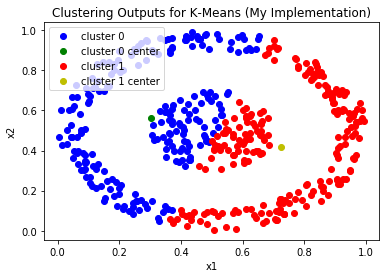

In [207]:
X = np.genfromtxt('data.csv', delimiter=',')
kmeans = KM(2).run(X)
assignment = kmeans.assignment
centers = kmeans.centers
X0 = X[assignment == 0]
X1 = X[assignment == 1]

plt.plot(X0[:, 0], X0[:, 1], 'bo', label='cluster 0')
plt.plot(centers[0, 0], centers[0, 1], 'go', label='cluster 0 center')
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='cluster 1')
plt.plot(centers[1, 0], centers[1, 1], 'yo', label='cluster 1 center')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for K-Means (My Implementation)')
plt.show()

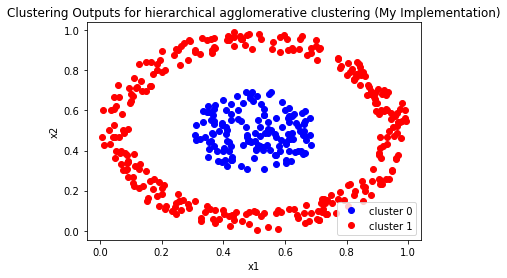

In [210]:
agg = Agg(2).run(X)
labels = agg.labels_
X0 = X[labels == 0]
X1 = X[labels == 1]
plt.plot(X0[:, 0], X0[:, 1], 'bo', label='cluster 0')
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='cluster 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Outputs for hierarchical agglomerative clustering (My Implementation)')
plt.show()